# Advanced data analysis: group project

By delivering this notebook, we confirm that the code presented was developed by the following students.

## Student 1: LAURA WEIL, 53012 
## Student 2: HELENA KRUMM, 55577 


In the solutions for exercises 1 to 5 you should include necessarily one solution using Pandas/scikit learn and one using Spark.

Some useful links:
* [ACM DEBS 2015 Grand Challenge](http://www.debs2015.org/call-grand-challenge.html)

* [Pandas documentations](https://pandas.pydata.org/docs/)

* [scikit-learn](https://scikit-learn.org/stable/)

* [Spark web site](https://spark.apache.org/)

* [Spark MLlib main page](https://spark.apache.org/mllib/)
* [Spark MLlib guide](https://spark.apache.org/docs/latest/ml-guide.html)

* [Spark GraphX main page](https://spark.apache.org/graphx/)
* [Spark GraphFrames main page](https://graphframes.github.io/graphframes/docs/_site/index.html)
* [Spark GraphFrames User Guide](https://graphframes.github.io/graphframes/docs/_site/user-guide.html)

Run the following cell just to check if it is running in COLAB.

In [ ]:
import sys
import os

IN_COLAB = 'google.colab' in sys.modules

In [ ]:
from sklearn.ensemble import RandomForestClassifier

## Install software

The following cell will install Spark, if the notebook is running on COLAB. 

Before running this cell, you should access the following link [https://drive.google.com/drive/folders/1rPCvd5F-uAoWtMYxvMvRyvL-F_1ihmQ-?usp=sharing](https://drive.google.com/drive/folders/1rPCvd5F-uAoWtMYxvMvRyvL-F_1ihmQ-?usp=sharing) and "Add Shortcut to Drive".


In [ ]:
# Install needed software
# Run this cell once before running the other cells in the notebook
if IN_COLAB:
    !apt-get install openjdk-11-jdk-headless
    !pip install pyspark    

!pip install gdown
!mkdir checkpoint



Reading package lists... Done
Building dependency tree       
Reading state information... Done
openjdk-11-jdk-headless is already the newest version (11.0.17+8-1ubuntu2~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 34 kB/s 
     |████████████████████████████████| 199 kB 53.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=cc425659df30e0f0e0b73d669f6c28ab22dd360cfb88106649af8a51f3694a01
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
!wget https://repos.spark-packages.org/graphframes/graphframes/0.8.2-spark3.2-s_2.12/graphframes-0.8.2-spark3.2-s_2.12.jar
os.environ['PYSPARK_SUBMIT_ARGS'] = '--jars graphframes-0.8.2-spark3.2-s_2.12.jar pyspark-shell'


--2022-12-04 21:32:31--  https://repos.spark-packages.org/graphframes/graphframes/0.8.2-spark3.2-s_2.12/graphframes-0.8.2-spark3.2-s_2.12.jar
Resolving repos.spark-packages.org (repos.spark-packages.org)... 99.84.160.25, 99.84.160.46, 99.84.160.66, ...
Connecting to repos.spark-packages.org (repos.spark-packages.org)|99.84.160.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 247880 (242K) [binary/octet-stream]
Saving to: ‘graphframes-0.8.2-spark3.2-s_2.12.jar’

graphframes-0.8.2-s 100%[===================>] 242.07K  --.-KB/s    in 0.03s   

2022-12-04 21:32:31 (6.84 MB/s) - ‘graphframes-0.8.2-spark3.2-s_2.12.jar’ saved [247880/247880]



## Setup Data

The first time you run the notebook, before running this cell, you should access the following link https://drive.google.com/drive/folders/1rPCvd5F-uAoWtMYxvMvRyvL-F_1ihmQ-?usp=sharing and select the "Add Shortcut to Drive". This will add a shortcut to the datasets to your Google Drive.

The following cell will mount the directory into Colab environment, so that it can be accessed as a local file.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#Select the dataset you want to use by uncommnting the appropriate line and running this cell

#Small dataset 100K lines
#FILENAME="/content/drive/MyDrive/group2223/tiny.csv"

#Default dataset 2M lines
FILENAME="/content/drive/MyDrive/group2223/sample.csv"

#Huge dataset 173M lines - use only in exercise 0
#FILENAME="/content/drive/MyDrive/group2223/sorted_data.csv"



### Alternative way to access data

Alternatively you can access data by downloading the data into the colab running environment. The following sets download different datasets - download the one you need.

Run the following cell to download a **tiny** dataset. You can download it to you computer using this URL: https://drive.google.com/file/d/12urSB0j_bMKhGcX3JReMEnyJ6sBNlJvZ



In [ ]:
!gdown 12urSB0j_bMKhGcX3JReMEnyJ6sBNlJvZ
!unzip -u tiny.csv.zip
!rm tiny.csv.zip
FILENAME="tiny.csv"


Downloading...
From: https://drive.google.com/uc?id=12urSB0j_bMKhGcX3JReMEnyJ6sBNlJvZ
To: /content/tiny.csv.zip
100% 6.87M/6.87M [00:00<00:00, 216MB/s]
Archive:  tiny.csv.zip
  inflating: tiny.csv                


Alternatively, run the following cell to download the **default** dataset. You can download the file to your computer using this URL: 
https://drive.google.com/file/d/1sUVxmBiKBalWOVwEf2lcm1xVHRQK1t_A

In [ ]:
!gdown 1sUVxmBiKBalWOVwEf2lcm1xVHRQK1t_A
!unzip -u sample.csv.zip
!rm sample.csv.zip
FILENAME="sample.csv"


Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1sUVxmBiKBalWOVwEf2lcm1xVHRQK1t_A 

unzip:  cannot find or open sample.csv.zip, sample.csv.zip.zip or sample.csv.zip.ZIP.
rm: cannot remove 'sample.csv.zip': No such file or directory


You can still run the following cell (this will take some time) to download a **huge** dataset - with 33GB !!! You can download the file to you computer using this URL: https://drive.google.com/file/d/1YmCNSZzLTXqPVVWG8D6uVRjPMtkcnTt5/view?usp=share_link

Use this dataset **only** for computing the result of exercise 0.

In [ ]:
!gdown 1YmCNSZzLTXqPVVWG8D6uVRjPMtkcnTt5
!unzip -u sorted_data.csv.zip
!rm sorted_data.csv.zip
FILENAME="sorted_data.csv"


Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1YmCNSZzLTXqPVVWG8D6uVRjPMtkcnTt5 

unzip:  cannot find or open sorted_data.csv.zip, sorted_data.csv.zip.zip or sorted_data.csv.zip.ZIP.
rm: cannot remove 'sorted_data.csv.zip': No such file or directory


## Initialization

import libraries.

In [ ]:
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyspark
import pyspark.pandas as ps
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.ml.linalg import Vectors
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import *
from pyspark.ml.feature import *
from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

plt.style.use('seaborn')


Let's start spark session and set *log* level to ERROR.

In [ ]:
spark = SparkSession.builder \
    .master("local") \
    .appName("Group project") \
    .config("spark.sql.execution.arrow.pyspark.enabled", "true") \
    .config("spark.driver.memory","15G") \
    .getOrCreate()

if IN_COLAB : 
    spark.sparkContext.addPyFile('graphframes-0.8.2-spark3.2-s_2.12.jar')
else:
    spark.sparkContext.addPyFile('/usr/local/spark/jars/graphframes-0.8.2-spark3.2-s_2.12.jar')

spark.sparkContext.setCheckpointDir("checkpoint")


## Simple statistics

First program prints simple statistics.

In [ ]:
spark = SparkSession \
    .builder \
    .master("local[*]") \
    .appName("Group project") \
    .getOrCreate()

mySchema = StructType([
    StructField("medallion", StringType()),
    StructField("hack_license", StringType()),
    StructField("pickup_datetime", TimestampType()),
    StructField("dropoff_datetime", TimestampType()),
    StructField("trip_time_in_secs", IntegerType()),
    StructField("trip_distance", DoubleType()),
    StructField("pickup_longitude", DoubleType()),
    StructField("pickup_latitude", DoubleType()),
    StructField("dropoff_longitude", DoubleType()),
    StructField("dropoff_latitude", DoubleType()),
    StructField("payment_type", StringType()),
    StructField("fare_amount", DoubleType()),
    StructField("surcharge", DoubleType()),
    StructField("mta_tax", DoubleType()),
    StructField("tip_amount", DoubleType()),
    StructField("tolls_amount", DoubleType()),
    StructField("total_amount", DoubleType()),
])

dataset = spark.read.load(FILENAME, format="csv", 
                         sep=",", schema=mySchema, header="false")
dataset.createOrReplaceTempView("data")

statistics = spark.sql( """SELECT COUNT( DISTINCT medallion) AS num_medallion, 
                                  COUNT( DISTINCT hack_license) AS num_license,
                                  MIN( pickup_datetime) AS min_pickup,
                                  MAX( dropoff_datetime) AS max_dropoff,
                                  MAX( trip_time_in_secs) AS max_trip_time,
                                  MAX( trip_distance) AS max_trip_distance,
                                  MAX( total_amount) AS max_total_amount
                                  FROM data""")
statistics.show()


+-------------+-----------+-------------------+-------------------+-------------+-----------------+----------------+
|num_medallion|num_license|         min_pickup|        max_dropoff|max_trip_time|max_trip_distance|max_total_amount|
+-------------+-----------+-------------------+-------------------+-------------+-----------------+----------------+
|        10867|      20354|2013-01-01 00:00:00|2013-01-21 00:11:45|        10800|            95.85|           465.0|
+-------------+-----------+-------------------+-------------------+-------------+-----------------+----------------+



## Ploting information

Example on how to plot information using matplotlib.

### First plot

This first plot helps showing that data has several invalid values.

Let's plot the pickups - you can see that there are points quite far from the expected locations. 

Plotting pickups


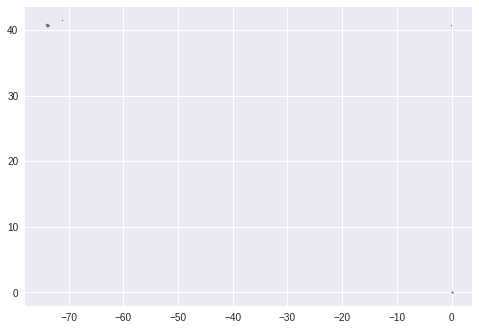

In [ ]:
spark = SparkSession \
    .builder \
    .master("local[*]") \
    .appName("Group project") \
    .getOrCreate()

mySchema = StructType([
    StructField("medallion", StringType()),
    StructField("hack_license", StringType()),
    StructField("pickup_datetime", TimestampType()),
    StructField("dropoff_datetime", TimestampType()),
    StructField("trip_time_in_secs", IntegerType()),
    StructField("trip_distance", DoubleType()),
    StructField("pickup_longitude", DoubleType()),
    StructField("pickup_latitude", DoubleType()),
    StructField("dropoff_longitude", DoubleType()),
    StructField("dropoff_latitude", DoubleType()),
    StructField("payment_type", StringType()),
    StructField("fare_amount", DoubleType()),
    StructField("surcharge", DoubleType()),
    StructField("mta_tax", DoubleType()),
    StructField("tip_amount", DoubleType()),
    StructField("tolls_amount", DoubleType()),
    StructField("total_amount", DoubleType()),
])

dataset = spark.read.load(FILENAME, format="csv", 
                         sep=",", schema=mySchema, header="false")
dataset.createOrReplaceTempView("data")

# Plotting all points is probably too much in many computers, so lets plot only a few 1000's
data = spark.sql( "SELECT * FROM data LIMIT 1000")
pickups = data.collect()

print('Plotting pickups')
plt.scatter([row.pickup_longitude for row in pickups],
            [row.pickup_latitude for row in pickups],
            s=1)
plt.show()


### Plotting heatamps

This example shows how to **plot heatmaps** and how to **create a grid** with coordinates -- note that we need to group nearby coordinates together or (almost) every coordinate will be unique.

The example creates a grid, with cell of 150m of side (commented out the code for cells of 500m of side). It also filters out data that is outside of the area of interest - defined by northLatitude, southLatitude, westLatitude, eastLatitude coordinates.

\[From ACM DEBS 2015 Grand Challenge page\]

**Question 1**: Is the earth flat or how to map coordinates to cells?

**Answer**: For the challenge we allow a simplified flat earth assumption for mapping coordinates to cells in the queries. You can assume that a distance of 500 meter south corresponds to a change of 0.004491556 degrees in the coordinate system. For moving 500 meter east you can assume a change of 0.005986 degrees in the coordinate system.

In [ ]:
spark = SparkSession \
    .builder \
    .master("local[*]") \
    .appName("Group project") \
    .getOrCreate()

# Squares of 500 meters
#latitudeStep = 0.004491556
#longitudeStep = 0.005986
#northLatitude = 41.474937 - 0.5 * latitudeStep
#southLatitude = northLatitude - 300 * latitudeStep
#eastLongitude = -74.913585 - 0.5 * longitudeStep
#westLongitude = eastLongitude + 300 * longitudeStep

# Squares of 150 meters
latitudeStep = 0.0013474668
longitudeStep = 0.0017958
northLatitude = 40.95
southLatitude = northLatitude - 300 * latitudeStep
eastLongitude = -74.2
westLongitude = eastLongitude + 300 * longitudeStep

# function to round longitude to a point in the middle of the square
def longiRound( val):
    return ((val - eastLongitude) // longitudeStep) * longitudeStep + eastLongitude + longitudeStep / 2
spark.udf.register("longround", longiRound, DoubleType())

# function to round latitude to a point in the middle of the square
def latRound( l):
    return northLatitude - ((northLatitude - l) // latitudeStep) * latitudeStep - latitudeStep / 2
spark.udf.register("latround", latRound, DoubleType())

mySchema = StructType([
    StructField("medallion", StringType()),
    StructField("hack_license", StringType()),
    StructField("pickup_datetime", TimestampType()),
    StructField("dropoff_datetime", TimestampType()),
    StructField("trip_time_in_secs", IntegerType()),
    StructField("trip_distance", DoubleType()),
    StructField("pickup_longitude", DoubleType()),
    StructField("pickup_latitude", DoubleType()),
    StructField("dropoff_longitude", DoubleType()),
    StructField("dropoff_latitude", DoubleType()),
    StructField("payment_type", StringType()),
    StructField("fare_amount", DoubleType()),
    StructField("surcharge", DoubleType()),
    StructField("mta_tax", DoubleType()),
    StructField("tip_amount", DoubleType()),
    StructField("tolls_amount", DoubleType()),
    StructField("total_amount", DoubleType()),
])

dataset = spark.read.load(FILENAME, format="csv", 
                         sep=",", schema=mySchema, header="false")

# Let's filter data outside of the box and build a grid
# Points in each square are mapped to the center of the square.
dataset.createOrReplaceTempView("data")
filteredDataDF = spark.sql( """SELECT medallion, hack_license, pickup_datetime,
                                    dropoff_datetime, trip_time_in_secs, trip_distance,
                                    longround(pickup_longitude) AS pickup_longitude, 
                                    latround(pickup_latitude) AS pickup_latitude,
                                    longround(dropoff_longitude) AS dropoff_longitude, 
                                    latround(dropoff_latitude) AS dropoff_latitude, 
                                    payment_type, fare_amount, mta_tax, 
                                    tip_amount, tolls_amount, total_amount
                                  FROM data
                                  WHERE pickup_longitude >= """ + str(eastLongitude) + """ AND
                                  pickup_longitude <=  """ + str(westLongitude) + """ AND
                                  dropoff_longitude >=  """ + str(eastLongitude) + """ AND
                                  dropoff_longitude <=  """ + str(westLongitude) + """ AND
                                  pickup_latitude <= """ + str(northLatitude) + """ AND
                                  pickup_latitude >= """ + str(southLatitude) + """ AND
                                  dropoff_latitude <=  """ + str(northLatitude) + """ AND
                                  dropoff_latitude >=  """ + str(southLatitude))
filteredDataDF.createOrReplaceTempView("data")

# Frequency for pickups
pickupsDF = spark.sql( """SELECT pickup_longitude, pickup_latitude, count(*) AS cnt
                                  FROM data
                                  GROUP BY pickup_longitude, pickup_latitude""")
pickups = pickupsDF.collect()

print('Plotting pickups')
p = plt.scatter([row.pickup_longitude for row in pickups],
            [row.pickup_latitude for row in pickups],
            c=[row.cnt for row in pickups],s=1,cmap="rainbow")
plt.colorbar(p)
plt.show()

# Statistics for dropoffs
dropoffsDF = spark.sql( """SELECT dropoff_longitude, dropoff_latitude, count(*) AS cnt
                                  FROM data
                                  GROUP BY dropoff_longitude, dropoff_latitude""")
dropoffs = dropoffsDF.collect()

print('Plotting dropoffs')
p = plt.scatter([row.dropoff_longitude for row in dropoffs],
            [row.dropoff_latitude for row in dropoffs],
            c=[row.cnt for row in dropoffs],s=1,cmap="rainbow")
plt.colorbar(p)
plt.show()



## Exercise 0: another simple statistics

This example computes, for each license, the number of trips performed.

We have the code using Spark and Pandas, printing the time for doing the computation.
**Draw some conclusions** by comparing the time for performing the computation using Spark and Pandas, and also when using the different datasets - **Make sure you run each cell more than once and write down the last value**.

### Code: Spark

In [ ]:
spark = SparkSession \
    .builder \
    .master("local[*]") \
    .appName("Group project") \
    .getOrCreate()

start_time = time.time()
mySchema = StructType([
    StructField("medallion", StringType()),
    StructField("hack_license", StringType()),
    StructField("pickup_datetime", TimestampType()),
    StructField("dropoff_datetime", TimestampType()),
    StructField("trip_time_in_secs", IntegerType()),
    StructField("trip_distance", DoubleType()),
    StructField("pickup_longitude", DoubleType()),
    StructField("pickup_latitude", DoubleType()),
    StructField("dropoff_longitude", DoubleType()),
    StructField("dropoff_latitude", DoubleType()),
    StructField("payment_type", StringType()),
    StructField("fare_amount", DoubleType()),
    StructField("surcharge", DoubleType()),
    StructField("mta_tax", DoubleType()),
    StructField("tip_amount", DoubleType()),
    StructField("tolls_amount", DoubleType()),
    StructField("total_amount", DoubleType()),
])

dataset = spark.read.load(FILENAME, format="csv", 
                         sep=",", schema=mySchema, header="false")
dataset.createOrReplaceTempView("data")
statistics = spark.sql( """SELECT hack_license, COUNT(*) AS cnt FROM data GROUP BY hack_license""")
statistics.show()

end_time = time.time()

print( "Runtime = " + str(end_time - start_time))


### Results (Spark)

**Tiny dataset**

The time to process the small dataset was : **0.6243724822998047** seconds.

**Default dataset**

The time to process the small dataset was : **4.501862049102783** seconds.

**Large dataset**

The time to process the small dataset was : **483.1423604488373** seconds.


### Code: Pandas library

In [ ]:
start_time = time.time()
mySchema = ["medallion", "hack_license", "pickup_datetime",
            "dropoff_datetime", "trip_time_in_secs", "trip_distance",
            "pickup_longitude", "pickup_latitude", "dropoff_longitude",
            "dropoff_latitude", "payment_type", "fare_amount", 
            "surcharge", "mta_tax", "tip_amount",
            "tolls_amount", "total_amount"]

dataset = pd.read_csv(FILENAME,names=mySchema)
result = dataset.groupby("hack_license").count()
print(result)

end_time = time.time()

print( "Runtime = " + str(end_time - start_time))


### Results (Pandas)

**Tiny dataset**

The time to process the small dataset was : **0.24958395957946777** seconds.

**Default dataset**

The time to process the small dataset was : **4.696081876754761** seconds.

**Large dataset**

The time to process the small dataset was : **N/A*** seconds.

*Received following error notification: "Your session crashed after using all available RAM..."

#### **Results discussion**

As can be deduced from the two Results cells above the runtime for the tiny dataset was higher when using Sparks (1.29sec) compared to Pandas (0.57sec). For the default dataset, the runtimes for Spark and Pandas were significantly close (4.501sec compared to 4.696sec, respectively). Strikingly, this laptop did not succeed in loading the large dataset with Pandas, because of limited RAM. The large dataset took 483.142sec to load in Spark.

Shorter runtimes for Spark for the large dataset can be explained when considering Spark executes computations in a distributed way, in parallel by multiple nodes. Spark divides the dataframe up in multiple machines and reorders operators for better performance. This allows Spark to achieve faster runtimes when working with larger datasets. However, distributed processing results in longer runtimes for smaller datsets, because operations first have to be reordered over multiple nodes. This explains why, for the small dataset, the runtimes in Spark were higher than in Pandas.

On the other hand, Pandas runs computations on a single machine. Pandas loads the data into memory on a single machine (one node) for rapid execution. This helps explain the RAM error that resulted from performing the computation on the large dataset with Pandas; the size of the dataset exceeded the total RAM of this laptop. Hence, because the Pandas DataFrame is not distributed, processing in the Pandas DataFrame will be slower for large amounts of data. However, because computations are executed immediately, on a single node, runtimes are lower for smaller datasets, compared to processing with Spark (as can be seen with the tiny dataset).

The proximity of runtimes in Spark and Pandas for the default dataset implies that the two libraries are equally efficient in performing the computations in parallel vs non-distributed processing for the particular size of the default dataset. This means that, based on runtimes, there is no benefit in using Spark over Pandas or vice-versa; the benefits of distributed and non-distributed processing balance eachother out**

**CLEANING DATA**

In [ ]:
mySchema = ["medallion", "hack_license", "pickup_datetime",
            "dropoff_datetime", "trip_time_in_secs", "trip_distance",
            "pickup_longitude", "pickup_latitude", "dropoff_longitude",
            "dropoff_latitude", "payment_type", "fare_amount", 
            "surcharge", "mta_tax", "tip_amount",
            "tolls_amount", "total_amount"]

dataset = pd.read_csv(FILENAME,names=mySchema)
dataset

#remove coordinates far from NYC
dataset1 = dataset.copy()
dataset1 = dataset1[(dataset1['pickup_longitude']>=-74.03)&(dataset1['pickup_longitude']<=-73.92)]
dataset1 = dataset1[(dataset1['pickup_latitude']>=40.68)&(dataset1['pickup_latitude']<=40.86)]

dataset1 = dataset1[(dataset1['dropoff_longitude']>=-74.03)&(dataset1['dropoff_longitude']<=-73.92)]
dataset1 = dataset1[(dataset1['dropoff_latitude']>=40.68)&(dataset1['dropoff_latitude']<=40.86)]

#remove negative numbers 
dataset2 = dataset1.copy()
dataset2['fare_amount'] = dataset2['fare_amount'].abs()
dataset2['surcharge'] = dataset2['surcharge'].abs()
dataset2['mta_tax'] = dataset2['mta_tax'].abs()
dataset2['tip_amount'] = dataset2['tip_amount'].abs()
dataset2['tolls_amount'] = dataset2['tolls_amount'].abs()
dataset2['total_amount'] = dataset2['total_amount'].abs()

#checking for null and nan values 
check_null = dataset2[mySchema].isnull().sum()
check_nan = check_null = dataset2[mySchema].isna().sum()
#returned 0 in both cases, hence, no NaN or null values are present in the (default) datset

dataset2.describe()

 

,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
count,1.764012e+06,1.764012e+06,1.764012e+06,1.764012e+06,1.764012e+06,1.764012e+06,1.764012e+06,1.764012e+06,1.764012e+06,1.764012e+06,1.764012e+06,1.764012e+06
mean,5.897280e+02,2.069005e+00,-7.398093e+01,4.075340e+01,-7.397973e+01,4.075390e+01,9.526163e+00,3.229028e-01,4.998211e-01,9.647968e-01,1.118643e-02,1.132487e+01
std,3.544970e+02,1.588826e+00,1.662258e-02,2.233570e-02,1.760047e-02,2.435986e-02,5.040430e+00,3.756757e-01,9.454887e-03,1.344939e+00,2.519372e-01,5.763676e+00
min,0.000000e+00,0.000000e+00,-7.403000e+01,4.068000e+01,-7.403000e+01,4.068000e+01,2.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00
25%,3.600000e+02,1.000000e+00,-7.399216e+01,4.073880e+01,-7.399152e+01,4.073894e+01,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,7.500000e+00
50%,5.400000e+02,1.610000e+00,-7.398225e+01,4.075486e+01,-7.398144e+01,4.075518e+01,8.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,1.000000e+01
75%,7.800000e+02,2.640000e+00,-7.397043e+01,4.076736e+01,-7.396887e+01,4.076838e+01,1.150000e+01,5.000000e-01,5.000000e-01,1.700000e+00,0.000000e+00,1.362000e+01
max,1.080000e+04,4.459000e+01,-7.392001e+01,4.085996e+01,-7.392001e+01,4.085998e+01,3.000000e+02,1.250000e+01,5.000000e-01,1.770000e+02,1.505000e+01,3.005000e+02


In [ ]:
#create spark dataframe 
sparkDF = spark.createDataFrame(dataset2)
sparkDF.createOrReplaceTempView("data")


## Exercise 1

Let's start by trying to help the city to identify which new bus routes should be introduced. To this end, you should find the most frequent routes whose distance is above a given treshold (defined by you).

For establishing these routes, we suggest that you use a grid of 500m of side.

In [ ]:
# Squares of 500 meters
latitudeStep = 0.004491556
longitudeStep = 0.005986
northLatitude = 41.474937 - 0.5 * latitudeStep
southLatitude = northLatitude - 300 * latitudeStep
eastLongitude = -74.913585 - 0.5 * longitudeStep
westLongitude = eastLongitude + 300 * longitudeStep

# function to round longitude to a point in the middle of the square
def longiRound( val):
    return ((val - eastLongitude) // longitudeStep) * longitudeStep + eastLongitude + longitudeStep / 2
spark.udf.register("longround", longiRound, DoubleType())

# function to round latitude to a point in the middle of the square
def latRound( l):
    return northLatitude - ((northLatitude - l) // latitudeStep) * latitudeStep - latitudeStep / 2
spark.udf.register("latround", latRound, DoubleType())

mySchema = StructType([
    StructField("medallion", StringType()),
    StructField("hack_license", StringType()),
    StructField("pickup_datetime", TimestampType()),
    StructField("dropoff_datetime", TimestampType()),
    StructField("trip_time_in_secs", IntegerType()),
    StructField("trip_distance", DoubleType()),
    StructField("pickup_longitude", DoubleType()),
    StructField("pickup_latitude", DoubleType()),
    StructField("dropoff_longitude", DoubleType()),
    StructField("dropoff_latitude", DoubleType()),
    StructField("payment_type", StringType()),
    StructField("fare_amount", DoubleType()),
    StructField("surcharge", DoubleType()),
    StructField("mta_tax", DoubleType()),
    StructField("tip_amount", DoubleType()),
    StructField("tolls_amount", DoubleType()),
    StructField("total_amount", DoubleType()),
])
#filtering the dataset
filteredDataDF = spark.sql( """SELECT medallion, hack_license, pickup_datetime,
                                    dropoff_datetime, trip_time_in_secs, trip_distance,
                                    longround(pickup_longitude) AS pickup_longitude, 
                                    latround(pickup_latitude) AS pickup_latitude,
                                    longround(dropoff_longitude) AS dropoff_longitude, 
                                    latround(dropoff_latitude) AS dropoff_latitude, 
                                    payment_type, fare_amount, mta_tax, 
                                    tip_amount, tolls_amount, total_amount
                                  FROM data
                                  WHERE pickup_longitude >= """ + str(eastLongitude) + """ AND
                                  pickup_longitude <=  """ + str(westLongitude) + """ AND
                                  dropoff_longitude >=  """ + str(eastLongitude) + """ AND
                                  dropoff_longitude <=  """ + str(westLongitude) + """ AND
                                  pickup_latitude <= """ + str(northLatitude) + """ AND
                                  pickup_latitude >= """ + str(southLatitude) + """ AND
                                  dropoff_latitude <=  """ + str(northLatitude) + """ AND
                                  dropoff_latitude >=  """ + str(southLatitude))
filteredDataDF.createOrReplaceTempView("data")

# filter for trips with distances larger than 5km 
data_threshold = spark.sql("""SELECT medallion, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, trip_distance FROM data WHERE trip_distance > 3.10686""")

frequent_routes = data_threshold.groupBy("pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude") \
                          .count() \
                          .sort(desc("count"))
frequent_routes.show(10)

+----------------+------------------+-----------------+------------------+-----+
|pickup_longitude|   pickup_latitude|dropoff_longitude|  dropoff_latitude|count|
+----------------+------------------+-----------------+------------------+-----+
|      -73.991741| 40.75179648399999|       -73.955825| 40.76527115199999|  286|
|      -73.991741| 40.75179648399999|       -73.955825| 40.77874581999999|  285|
|      -73.991741| 40.75179648399999|       -73.955825| 40.77425426399999|  273|
|      -73.991741| 40.75179648399999|       -73.949839| 40.77425426399999|  250|
|      -74.009699|40.711372479999994|       -73.985755|40.756288039999994|  236|
|      -73.991741| 40.75179648399999|       -73.955825|40.769762707999995|  236|
|      -73.955825| 40.77874581999999|       -73.991741| 40.75179648399999|  233|
|      -73.949839| 40.77425426399999|       -73.991741| 40.75179648399999|  224|
|      -73.949839| 40.77874581999999|       -73.991741| 40.75179648399999|  222|
|      -73.955825| 40.774254

##**Discussion - Q1**##

In order to find the most frequent routes it is necessary to first group coordinates together. When not grouping coordinates we will end up with only different routes (because (almost) every coordinate is unique). Consequently, pickup and dropoff coordinates in cells of 500 by 500 meters will be stacked, and their new coordinates will be equal to the center of the grid. 

The grouping of coordinates is done by creating a gird, with cells of 500m, size. Following the example, we also filtered out data that is outside of the area of interest - defined by northLatitude, southLatitude, westLatitude, eastLatitude coordinates. In addition, we filtered for trips with distances larger than 5 km. We assumed a threshold of 5km, somewhat below the average distance people ride in a single trip in New York area (7.9km or 4.9miles).*

Subsequently, we grouped by "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude" in order to get particular routes and used count() as aggregation measure to compute the number of times a route was used. In addition, we sorted the count columnn in descending order and showed the first 10 rows, to get the top 10 most frequent routes.

As can be deduced from the cell above the most frequent route has a count of 286. This route starts at LaGuardia Airport and ends in park avenue, 49th street, in the center of NewYork. Intuitively, the popularity of this route is likely due to a signficantly high number of travelers that need transportation to the city centre. 

The top 10 computed in this exercise can be used as a suggestion for which bus routes should be introduced. Assuming people choose the bus over taxis (because the former is a cheaper option) this would reduce taxi traffic on these routes. Moreover, assuming that taxi traffic is representative for general car traffic, busses might also be an alternative for people who use their own cars or platform services such as UBER. Hereby, introducing busses along these routes would reduce car traffic in general, combatting traffic congestions as well as emissions. 

*source: https://moovitapp.com/insights/en/Moovit_Insights_Public_Transit_Index_United_States_NYCNJ-121

## Exercise 2

The taxi trips can be classified in two categories, depending on whether the client has given a tip or not (or alternatively in three categories - no tip, low percentage tip, high percentage tip). Propose a method to predict the class of a given trip (for the prediction, you cannot use the value of the tip).

tip_binary           1.000000
type_payment         0.964028
total_amount         0.169918
trip_time_in_secs    0.079303
fare_amount          0.071733
trip_distance        0.067462
tolls_amount         0.050590
surcharge            0.014108
mta_tax              0.004266
dropoff_longitude    0.004004
pickup_longitude     0.002953
pickup_latitude      0.002625
dropoff_latitude     0.002432
Name: tip_binary, dtype: float64
              precision    recall  f1-score   support

         0.0      1.000     0.965     0.982    255681
         1.0      0.964     1.000     0.982    243912

    accuracy                          0.982    499593
   macro avg      0.982     0.982     0.982    499593
weighted avg      0.983     0.982     0.982    499593



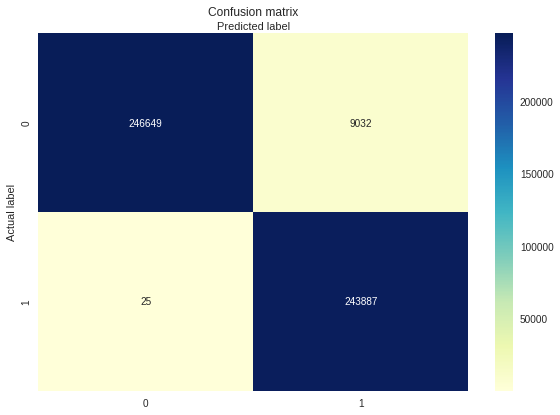

In [ ]:
columns = ["medallion", "hack_license","pickup_datetime","dropoff_datetime","trip_time_in_secs","trip_distance", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude", "payment_type", "fare_amount", "surcharge", "mta_tax", "tip_amount", "tolls_amount", "total_amount"]
dataDF = pd.read_csv(FILENAME, names = columns)

#assign binary column for tip/no-tip
dataDF.loc[dataDF["tip_amount"] > 0, "tip_binary"] = 1
dataDF.loc[dataDF["tip_amount"] == 0, "tip_binary"] = 0 

#assign binary column where cash=1, credit card=0
dataDF.loc[dataDF["payment_type"] == "CSH", "type_payment"] = 1
dataDF.loc[dataDF["payment_type"] == "CRD", "type_payment"] = 0
dataDF_reg = dataDF.drop(["tip_amount", "medallion", "hack_license", "pickup_datetime", "dropoff_datetime", "payment_type"], axis=1)
dataDF_reg.dropna(inplace=True)

#create correlation matrix
corr = dataDF_reg.corr().abs()
corr = corr["tip_binary"]
corr = corr.sort_values(axis = 0, ascending = False)
print(corr)

y = dataDF_reg["tip_binary"] #target
x = dataDF_reg.drop(["tip_binary"], axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2)

# instantiate the model (using the default parameters)
logreg = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
# fit the model with data
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

#evaluate model 
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

#plot 
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print(metrics.classification_report(y_test,y_pred,digits=3))


In [ ]:
#k-fold cross validation
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier()
scores = cross_val_score(model, X_train, y_train, cv=5)
print(scores)

[0.99569316 0.99641375 0.99604344 0.99599006 0.99603343]


##Discussion - Q2##

For this question we classified taxi trips in two categories: tip and no-tip. In order to predict the class of a given trip, Random Forest classification was used. The latter is suitable for our classification because our categories - tip and no-tip - constitute binary classes.

First, we created a column for the target variable (tip/no-tip). If the condition "tip amount is higher than 0" was met, we assumed tip was given and the ride was assigned 1 in the tip_binary column. In addition, we created a binary column for the type of payment (card or cash). When cash was used, the ride was assigned a 1 in the type_binary column.

Subsequently, we dropped columns containing non-numerical values including "medallion", "hack_license", "pickup_datetime", "dropoff_datetime" and "payment_type". For the remaining columns, we computed the correlation for each of them with tip_binary. The correlation matrix shown in the cell above shows significantly high correlations between tip and the payment type. Intuitively, this can be explained because taxidrivers tend to only report tips when clients pay by card because of legal reasons. As a result, a high correlation between payment type and tip was expected because, on paper, taxi drivers virtually never receive tip when clients pay with cash.

Next, the data was split into train and test set and the Random Forest classification model was then initiated and trained with the train set. In order to evaluate the accuracy of the obtained model, a confusion matrix was created. The accuracy (the number of correct predcitions as share of the total number of predictions) is significantly high for this model (98.2%). This is visually displayed in the confusion matrix which shows 25 False Negatives and 9032 false positives (i.e. there were 25 cases in the set where the model predicted that no tip was given when tip was given and 9032 instances where the model predicted tip was given, but no tip was given). By dividing the sum of the True positives (243887) and True Negatives (246649) by the total number of cases, one can obtain the accuracy. 

Finally, we checked for overfitting with k-fold cross validation. Over 10 folds, the results of the cross-validation were the following:

[0.99569316, 0.99641375, 0.99604344, 0.99599006, 0.99603343] 

Given a low standard deviation of the values in the matrix above, we can conclude that accuracy over 10 folds was consistently high, indicating the model can be generalized. Therefore, the Random Forest classification model is a reasonable way to predict whether tip is given or not for a particular trip.











## Exercise 3

The third question intends to help taxi drivers to decide to which area of the city they should go next. To this end, we could have a web site/mobile app where the drivers could check the best area at a given moment. To support such application efficiently, it would be necessary to have a pre-computed index with the value for each area and period of time (e.g. combining the week day and a period of one hour). 

You should create the program to create such index. The output tuples should be something like: longitude latitude day_of_week hour value.

Define your own metric for the value of an area. Parameters that may be included in such metric include: the number of pickups in the area, the amount collected in the trip, the average time a taxi is idle in the area, etc.

Besides presenting the code, explain the rationale of your solution.

**Note:** SQL functions date(col), dayofweek(col) and hour(col) return, respectively, the date, day of week and hour of a datatime in column col.

In [ ]:
#use the filtered dataset from question one with the pickup and dropoff points stacked in grids
pandas = filteredDataDF.toPandas()

#in order to get a string with longitude latitude day_of_week hour value we create seperate columns with hours and weekdays 
pandas['pickup_datetime'] = pd.to_datetime(pandas['pickup_datetime'])
pandas['pickup_time'] = pandas['pickup_datetime'].dt.time
pandas['pickup_hour'] = pandas['pickup_datetime'].dt.hour
pandas["pickup_weekday"] = pandas['pickup_datetime'].dt.weekday


In [ ]:
#distribution of weekdays
for x in range(7):
  weekday = pandas[pandas["pickup_weekday"]==x]
  #print(len(weekday))

In [ ]:
#distribution of hours: 
for x in range(24):
  hours_test = pandas[pandas["pickup_hour"]==x]
  #print(len(hours_test))

In [ ]:
#result = pd.DataFrame(columns=["week", "hour", "longitude", "latitude")

weekdays = []
hours_pickup = []
long_pickup = []
lat_pickup = []

for x in range(7):
  weekday = pandas[pandas["pickup_weekday"]==x]
  for y in range(24):
    hours = pandas[pandas["pickup_hour"]==y]
    hours = hours.copy()
    highest = hours.groupby(["pickup_longitude", "pickup_latitude"])["total_amount"].mean()
    highest = highest.reset_index()
    highest["ranked"] = highest.total_amount.rank(na_option = 'bottom')
    highest = highest.sort_values(by="ranked",ascending=False)

    #appending to lists
    weekdays.append(x)
    hours_pickup.append(y)
    long_pickup.append(highest.iloc[0,0])
    lat_pickup.append(highest.iloc[0,1])

dictionary = {'week': weekdays, 'hour': hours_pickup, 'longitude': long_pickup, 'latitude': lat_pickup}     
results = pd.DataFrame(dictionary)
results.head()

,week,hour,longitude,latitude
0,0,0,-73.997727,40.805695
1,0,1,-73.919909,40.837136
2,0,2,-73.997727,40.801204
3,0,3,-73.979769,40.819170
4,0,4,-74.027657,40.751796


In [ ]:
weekday = int(input("Insert day of the week here: "))
hour = int(input("Insert hour of the day here: "))

optimal = results[(results["week"]==weekday) & (results["hour"]==hour)]
print("\nthe best area to go is on latitude ",optimal.iloc[0,2],"and longitude ",optimal.iloc[0,3])


Insert day of the week here: 4
Insert hour of the day here: 3

the best area to go is on latitude  -73.979769 and longitude  40.81916982399999


#### Discussion - Q3

For this question, we assumed that the total amount collected in a trip is the most important attribute when choosing a pick-up location for taxi drivers. Therefore, the metric used to create an index for the best places to pickup clients at a particular day and time is the mean of the "total_amount" for different pickup regions.

The filtered dataframe from question 1 (in which pickup latitudes and longitudes are stacked in grids of 500m by 500m) was used to distinguish between a feasible amount of regions. 

First, we converted the pickup_datetime column to datetime format and then created two new columns in which datetime was split into hours and days - "pickup_hour" and "pickup_weekday" respectively. This allowed us to compute optimal locations for different days in the week and hours throughout the day. Note that the weekdays are represented by a range of 0 to 6, meaning monday is equal to 0, and sunday is equal to 6. In addition, hours of the day are represented by a range of 0 to 23 (following the European 24-hour clock).

Subsequently, we created a for loop in which we iterated over different weekdays, and within this iteration over different hours of the day. We grouped by pickup-point grids (i.e. "pickup_longitude", "pickup_latitude") and used the mean as aggregate function to compute the average total amount taxi drivers received for trips starting in different pickup grids. We then ranked these averages to create an index based on pickup locations with the highest average total amount. For every iteration, the weekday, hour, and grid coordinates associated with the highest rank were then added to a table, displaying the optimal pickup location for different days and hours. 

In order to make the program more user friendly we created an input function that receives the day of the week and hour of the day, and returns the optimal pickup location. Taxi drivers only need to insert the weekday and hour of the day to get the coordinates of the best pickup location (an example is provided in the cell above with pickup time between 13:00 and 14:00 on a Sunday).

## Exercise 4

The fourth question intends to help define the location of taxi ranks (the places where taxis stop waiting for collecting clients) in a way that tries to minimize the distance a client needs to travel to reach the taxi rank.

Consider that you want to establish, at least, 100 taxi ranks but no more than 150 - present the code that defines the number and locations of the ranks.

**Note:** This dataset is for NYC taxis. So, pickups outside of the city are infrequent and not representative of the demand in such areas. As such, you should focus on pickups in a square that includes NYC (it is ok if the square includes parts outside of the city). Use, for example, the following square:
```
northLatitude = 40.86
southLatitude = 40.68
eastLongitude = -74.03
westLongitude = -73.92
```

**Suggestion:** Plot your results as a heatmap, with the color being a measurement of the value of the taxi rank; use the visual feedback to enhance your solution.

Cluster Centers: 
[-73.98873865  40.76551511]
[-73.95599264  40.7673695 ]
[-73.9514363   40.71265781]
[-74.00661648  40.73256687]
[-73.9910289   40.74291872]
[-74.00700223  40.70677076]
[-73.97124139  40.79577088]
[-73.9854486   40.73779925]
[-73.92537272  40.74360205]
[-73.97436501  40.74553792]
[-73.99591895  40.71503087]
[-73.95598677  40.69333362]
[-73.94160536  40.83805329]
[-73.97159301  40.78518213]
[-73.94888311  40.78139189]
[-73.98728531  40.74836179]
[-74.00260745  40.74912055]
[-73.97926848  40.74439549]
[-73.92926777  40.70035433]
[-73.97376898  40.76311034]
[-73.97421268  40.75664178]
[-73.97992652  40.73869882]
[-73.93806544  40.80016705]
[-74.00080145  40.72837526]
[-73.98820469  40.72017975]
[-73.99136045  40.73545016]
[-73.95993319  40.77709655]
[-73.95787428  40.81509521]
[-73.99613146  40.68324719]
[-73.95405003  40.77790463]
[-73.96034168  40.76315762]
[-73.99692768  40.75499316]
[-73.98500582  40.71601904]
[-73.96111779  40.79917258]
[-73.99724138  40.73892232]
[-

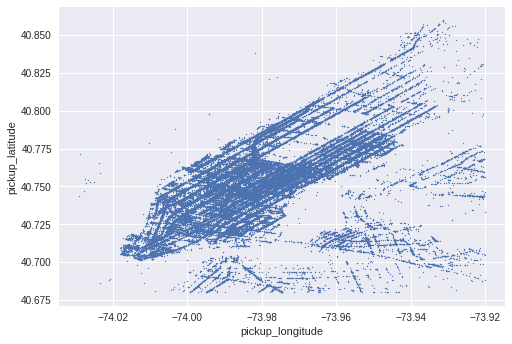

In [ ]:
#remove coordinates far from NYC 
dataset2 = dataset2[(dataset2['pickup_longitude']>=-74.03)&(dataset2['pickup_longitude']<=-73.92)&(dataset2['pickup_latitude']>=40.68)&(dataset2['pickup_latitude']<=40.86)]

SparkDF = spark.createDataFrame(dataset2)

dataset2.plot.scatter(x="pickup_longitude",y="pickup_latitude",s=1)

# Create the features column
assembler = VectorAssembler(inputCols=('pickup_longitude','pickup_latitude'),outputCol="features")
SparkDF = assembler.transform(SparkDF)

# Initialize the algorithm for 100 cluster
# setSeed to a constant allows to repeat the computation and generate exactly the same clusters
kmeans = KMeans().setK(100).setSeed(1)

# Generate a model from the dataset
model = kmeans.fit(SparkDF)

centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)


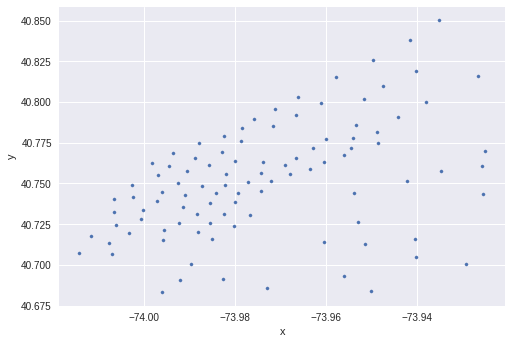

In [ ]:
df2 = pd.DataFrame(centers)
df2.rename(columns={0: 'x',
                   1: 'y'}, inplace=True)

df2.plot.scatter(x="x",y="y",s=10)  

In [ ]:
# Assign each element of the data set to a cluster number
predictions = model.transform(SparkDF)

# Evaluate the quality of the prediction
evaluator = ClusteringEvaluator()
score = evaluator.evaluate(predictions)

print( "Quality of predictions (higher is better):" + str(score)) 

Quality of predictions (higher is better):0.5286202177025753


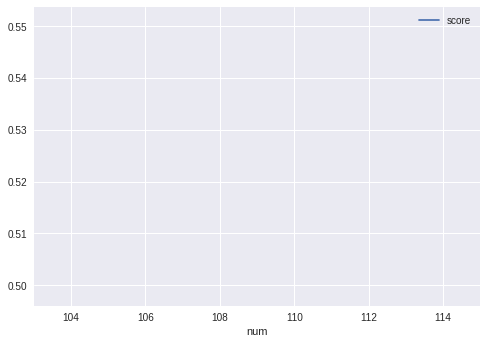

In [ ]:
# Finding out number of cluster
# Function to perform clustering of dataset data with K clusters, 
# returning the Silhouette score 
def evaluate(SparkDF, k):
    kmeans = KMeans().setK(k).setSeed(1)
    model = kmeans.fit(SparkDF)
    predictions = model.transform(SparkDF)
    evaluator = ClusteringEvaluator()
    score = evaluator.evaluate(predictions)
    return score

# For each value from 100 to 150 compute the clusters and the score
df = pd.DataFrame(columns=['num','score'])
for i in range(100,110):
  df = pd.concat([df2,pd.Series({"num": i, "score": evaluate(SparkDF,i)}).to_frame().T], ignore_index=True)

# Plot the scores    
df.plot( x="num", y="score")

/usr/local/lib/python3.8/dist-packages/pyspark/sql/pandas/conversion.py:114: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unsupported type in conversion to Arrow: VectorUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


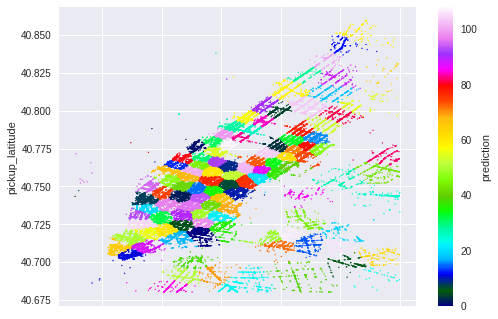

In [ ]:
k = int(df.nlargest(1,"score")["num"].values[0])

kmeans = KMeans().setK(k).setSeed(1)
model = kmeans.fit(SparkDF)
predictions = model.transform(SparkDF)

predictionsPD = predictions.toPandas()
# Display results, using the cluster number as the color
predictionsPD.plot.scatter(x="pickup_longitude",y="pickup_latitude",c="prediction",s=1,cmap='gist_ncar')

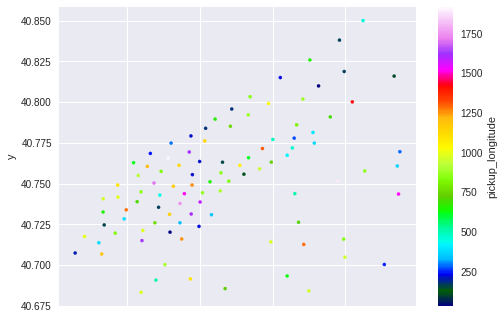

In [ ]:
df3 = predictionsPD.groupby('prediction')[['pickup_longitude']].count()
df3 = df3.reset_index()
merged = pd.merge(df2, df3, left_index=True, right_on='prediction')
merged.plot.scatter(x='x',y='y',c='pickup_longitude',s=10,cmap='gist_ncar')

#### Discussion - Q4

In order to help define the location of taxi ranks in NYC, we started by removing coordinates far from NYC to focus on pickups within the city. We plotted all the pickups in NYC to show that step for visualization. Next, we created a features column to have the pickup longitude and pickup latitude values in one column. 

After that we wanted to cluster together all the pickups. We implemented kmeans and started the algorithm for 100 clusters, with an output showing 100 ranks. We initialized the algorithm with 100 clusters just to understand what the data would look like with that amount. Next, we created cluster centers for each of the 100 clusters and printed both the cluster centers and all the pickups for visualization.

As a next step we assigned each element of the data set to a cluster number and evaluated the quality of the prediction. Then, we used a function to perform clustering of the dataset data with k clusters and returned the silhouette score to see what the clustering accuracy is. For each value we initially wanted to compute the clusters and scores from 100 to 150 but as it was taking a very long time to run we decided to use a range from 100 to 110.

The plot, which unfortunately does not show anymore (it did initially), would show the score of clusters from 100 to 110. After that the cluster with the highest score is chosen. The results are displayed using the cluster number as the color, showing all the pickup points in NYC.

Finally we merged the two datasets in order to have the predictions, the taxi ranks and the cluster centers in one dataframe. Finally, these were plotted to show the cluster centers of the ranked taxi pickup spots in NYC. The color depicts how many pickups occurred in the specific cluster center.



## Exercise 5


**For this question, we attempted to answer the question suggested in the assingment description, creating a community searching algorithm to find communities in NYC.**

In [ ]:
import networkx as nx 
from graphframes import *
from graphframes.examples import Graphs

In [ ]:
# Squares of 150 meters
latitudeStep = 0.0013474668
longitudeStep = 0.0017958
northLatitude = 40.95
southLatitude = northLatitude - 300 * latitudeStep
eastLongitude = -74.2
westLongitude = eastLongitude + 300 * longitudeStep
trip_min = 10

# function to round longitude to a point in the middle of the square
def longiRound( val):
    return ((val - eastLongitude) // longitudeStep) * longitudeStep + eastLongitude + longitudeStep / 2
spark.udf.register("longround", longiRound, DoubleType())

# function to round latitude to a point in the middle of the square
def latRound( l):
    return northLatitude - ((northLatitude - l) // latitudeStep) * latitudeStep - latitudeStep / 2
spark.udf.register("latround", latRound, DoubleType())

mySchema = StructType([
    StructField("medallion", StringType()),
    StructField("hack_license", StringType()),
    StructField("pickup_datetime", TimestampType()),
    StructField("dropoff_datetime", TimestampType()),
    StructField("trip_time_in_secs", IntegerType()),
    StructField("trip_distance", DoubleType()),
    StructField("pickup_longitude", DoubleType()),
    StructField("pickup_latitude", DoubleType()),
    StructField("dropoff_longitude", DoubleType()),
    StructField("dropoff_latitude", DoubleType()),
    StructField("payment_type", StringType()),
    StructField("fare_amount", DoubleType()),
    StructField("surcharge", DoubleType()),
    StructField("mta_tax", DoubleType()),
    StructField("tip_amount", DoubleType()),
    StructField("tolls_amount", DoubleType()),
    StructField("total_amount", DoubleType()),
])

dataset = spark.read.load(FILENAME, format="csv", 
                         sep=",", schema=mySchema, header="false")

# Let's filter data outside of the box and build a grid
# Points in each square are mapped to the center of the square.
dataset.createOrReplaceTempView("data")
filteredDataDF = spark.sql( """SELECT medallion, hack_license, pickup_datetime,
                                    dropoff_datetime, trip_time_in_secs, trip_distance,
                                    longround(pickup_longitude) AS pickup_longitude, 
                                    latround(pickup_latitude) AS pickup_latitude,
                                    longround(dropoff_longitude) AS dropoff_longitude, 
                                    latround(dropoff_latitude) AS dropoff_latitude, 
                                    payment_type, fare_amount, mta_tax, 
                                    tip_amount, tolls_amount, total_amount
                                  FROM data
                                  WHERE pickup_longitude >= """ + str(eastLongitude) + """ AND
                                  pickup_longitude <=  """ + str(westLongitude) + """ AND
                                  dropoff_longitude >=  """ + str(eastLongitude) + """ AND
                                  dropoff_longitude <=  """ + str(westLongitude) + """ AND
                                  pickup_latitude <= """ + str(northLatitude) + """ AND
                                  pickup_latitude >= """ + str(southLatitude) + """ AND
                                  dropoff_latitude <=  """ + str(northLatitude) + """ AND
                                  trip_distance > """ + str(trip_min) + """ AND
                                  dropoff_latitude >=  """ + str(southLatitude))
filteredDataDF.createOrReplaceTempView("data10")


In [ ]:
preprocDF = spark.sql( """SELECT
         concat('(',pickup_longitude,',',pickup_latitude,')') AS src,
         concat('(',dropoff_longitude,',',dropoff_latitude,')') AS dst,
         pickup_longitude, pickup_latitude,
         dropoff_longitude, dropoff_latitude
         FROM data10""")
preprocDF.createOrReplaceTempView("data11")
edges = spark.sql( """SELECT src, dst, 'trip' FROM data11""")

In [ ]:
vertex = spark.sql( """SELECT src as id, pickup_longitude as longitude,
                 pickup_latitude as latitude FROM data11
            UNION
                 SELECT dst as id, dropoff_longitude as longitude,
                          dropoff_latitude as latitude FROM data11""")

In [ ]:
graph = GraphFrame(vertex, edges)

/usr/local/lib/python3.8/dist-packages/pyspark/sql/dataframe.py:148: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(


In [ ]:
lpa = graph.labelPropagation(maxIter=5)

/usr/local/lib/python3.8/dist-packages/pyspark/sql/dataframe.py:127: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


In [ ]:
lpa_plot = lpa.collect()

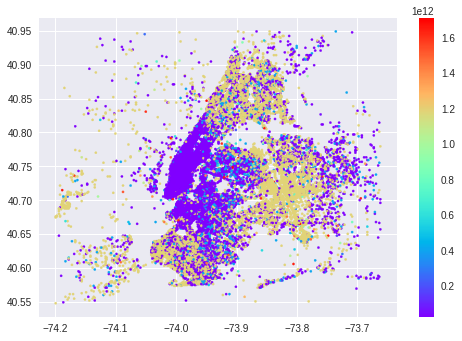

In [ ]:
p = plt.scatter([row.longitude for row in lpa_plot],
            [row.latitude for row in lpa_plot],
            c=[row.label for row in lpa_plot],s=5,cmap="rainbow")
plt.colorbar(p)
plt.show()

#### Discussion - Q5

**Explain the rationale of your solution, your code and discuss results**

Often networks are organized into communities. Hence, we used an algorithm here to find densely linked clusters, namely communities, in NYC. 

We created a graph using edges (with columns src and dest) and vertices (with a column id). We then ran algorithms on this graph to display the communities found in NYC.

Label propagation is a simple algorithm that relies on the premise that data points close to each other contain similar class labels. Consequently, we used these class labels to move through dense unlabeled data regions. 

To sum up, a connected graph was created by drawing links between different data points. Weights were established for each edge and then random trips from unlabeled points were carried out in order to find the probability distribution of reaching labeled points. These trips contain multiple iterations and continue until confluence is reached, meaning all paths were considered and probabilities don't change anymore.

Finally, the found communities are plotted in a scatterplot.